# **GAMES PROJECT MODEL CREATION**

## **IMPORTING LIBRARIES**

In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd


## **IMPORTING DATA**

In [59]:
df = pd.read_csv("Games_Cleaned.csv")
df.head()

,Id,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales_millions,Europe_Sales_millions,Japan_Sales_millions,RestWorld_Sales_millions,...,EU_VS_Japan,EU_VS_Both,JP_Sales_Category,JP_Global_Sales_Ratio,JP_Rest_Sales_Ratio,JP_VS_North,JP_VS_Europe,JP_VS_Both,Rest_Sales_Category,TotalWorld_Sales_Category
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,7.697613,0.641184,High,0.045564,0.445626,0.090865,0.129910,0.053468,High,High
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0.525698,0.099749,High,0.169235,8.844156,0.234182,1.902235,0.208512,High,High
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,3.398417,0.655804,High,0.105807,1.145015,0.239117,0.294255,0.131918,High,High
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,3.356707,0.578560,High,0.099394,1.108108,0.208254,0.297911,0.122571,High,High
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0.869863,0.413681,High,0.325789,10.220000,0.906832,1.149606,0.506944,High,High


## **EDA**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           16598 non-null  int64  
 1   Name                         16598 non-null  object 
 2   Platform                     16598 non-null  object 
 3   Year                         16598 non-null  float64
 4   Genre                        16598 non-null  object 
 5   Publisher                    16598 non-null  object 
 6   NorthAmerica_Sales_millions  16598 non-null  float64
 7   Europe_Sales_millions        16598 non-null  float64
 8   Japan_Sales_millions         16598 non-null  float64
 9   RestWorld_Sales_millions     16598 non-null  float64
 10  TotalWorld_Sales_millions    16598 non-null  float64
 11  Name_Categorized             16598 non-null  object 
 12  Platform_Category            16598 non-null  object 
 13  Game_Generation 

In [61]:
#num columns describtion
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,16598.0,8300.605254,4791.853933,1.00,4151.250000,8300.500000,12449.750000,16600.00
Year,16598.0,2006.406443,5.781197,1980.00,2003.000000,2007.000000,2010.000000,2020.00
NorthAmerica_Sales_millions,16598.0,0.264667,0.816683,0.00,0.000000,0.080000,0.240000,41.49
Europe_Sales_millions,16598.0,0.146652,0.505351,0.00,0.000000,0.020000,0.110000,29.02
Japan_Sales_millions,16598.0,0.077782,0.309291,0.00,0.000000,0.000000,0.040000,10.22
RestWorld_Sales_millions,16598.0,0.048063,0.188588,0.00,0.000000,0.010000,0.040000,10.57
TotalWorld_Sales_millions,16598.0,0.537441,1.555028,0.01,0.060000,0.170000,0.470000,82.74
Decade,16598.0,2001.817235,6.585456,1980.00,2000.000000,2000.000000,2010.000000,2020.00
Game_Age,16598.0,18.593557,5.781197,5.00,15.000000,18.000000,22.000000,45.00
Cumulative_Releases,16598.0,447.294727,342.170675,1.00,167.000000,376.000000,663.000000,1431.00


In [62]:
#cat columns describtion
df.describe(include='O').transpose()

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16598,578,Electronic Arts,1351
Name_Categorized,16598,50,Other,8989
Platform_Category,16598,10,Sony,6648
Game_Generation,16598,7,7th Gen,8395
People_Generation,16598,4,Gen Z,13540
Era,16598,5,2000s,9479
Industry_Phase,16598,4,Explosion,9208


In [63]:
#check null values
df.isnull().sum()

Id                             0
Name                           0
Platform                       0
Year                           0
Genre                          0
Publisher                      0
NorthAmerica_Sales_millions    0
Europe_Sales_millions          0
Japan_Sales_millions           0
RestWorld_Sales_millions       0
TotalWorld_Sales_millions      0
Name_Categorized               0
Platform_Category              0
Game_Generation                0
People_Generation              0
Decade                         0
Era                            0
Game_Age                       0
Industry_Phase                 0
Era_Category                   0
Pre_Post_PS2                   0
Cumulative_Releases            0
Category                       0
Gameplay_Focus                 0
Multiplayer                    0
Skills                         0
Target_Audience                0
Age_Range                      0
Publisher_Category             0
Region                         0
Category_G

In [64]:
# dtypes
df.dtypes.value_counts()

object     25
float64    24
int64       2
Name: count, dtype: int64

In [65]:
# Classify data types
df_cat =df.select_dtypes(include="object")
df_cat.head()

,Name,Platform,Genre,Publisher,Name_Categorized,Platform_Category,Game_Generation,People_Generation,Era,Industry_Phase,...,Skills,Target_Audience,Age_Range,Publisher_Category,Region,NA_Sales_Category,EU_Sales_Category,JP_Sales_Category,Rest_Sales_Category,TotalWorld_Sales_Category
0,Wii Sports,Wii,Sports,Nintendo,Other,Nintendo,7th Gen,Gen Z,2000s,Explosion,...,High,Teens,13-19,Nintendo,Japan,High,High,High,High,High
1,Super Mario Bros.,NES,Platform,Nintendo,Super Mario,Nintendo,3rd Gen,Millennial,80s,Foundation,...,Low,Kids,6-12,Nintendo,Japan,High,High,High,High,High
2,Mario Kart Wii,Wii,Racing,Nintendo,Super Mario,Nintendo,7th Gen,Gen Z,2000s,Explosion,...,High,Kids/Teens,6-15,Nintendo,Japan,High,High,High,High,High
3,Wii Sports Resort,Wii,Sports,Nintendo,Other,Nintendo,7th Gen,Gen Z,2000s,Explosion,...,High,Teens,13-19,Nintendo,Japan,High,High,High,High,High
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,Pokemon,Nintendo,5th Gen,Millennial,90s,Growth,...,Medium,Adults,20-40,Nintendo,Japan,High,High,High,High,High


In [66]:
df['Name_Categorized'].value_counts()

Name_Categorized
Other                  8989
The Legend of Zelda    3464
The Last of Us          782
Super Mario             458
God of War              433
Need for Speed          328
NBA 2K                  325
Red Dead Redemption     228
Monster Hunter          161
FIFA                    142
Street Fighter          124
Resident Evil           104
Metal Gear Solid         93
Dark Souls               91
Far Cry                  66
League of Legends        66
Grand Theft Auto         55
Sonic                    48
Counter Strike           47
Elden Ring               41
Assassin's Creed         36
Spider-Man               35
Mortal Kombat            32
Pac-Man                  32
Donkey Kong              31
Pokemon                  30
Crash Bandicoot          30
Animal Crossing          29
Tomb Raider              27
Battlefield              27
Watch Dogs               26
Space Invaders           26
Tetris                   25
Super Smash Bros         22
Kirby                    18
Des

In [67]:
df_num =df.select_dtypes(include=["float64","int64"])
df_num.head()

,Id,Year,NorthAmerica_Sales_millions,Europe_Sales_millions,Japan_Sales_millions,RestWorld_Sales_millions,TotalWorld_Sales_millions,Decade,Game_Age,Cumulative_Releases,...,EU_Global_Sales_Ratio,EU_Rest_Sales_Ratio,EU_VS_North,EU_VS_Japan,EU_VS_Both,JP_Global_Sales_Ratio,JP_Rest_Sales_Ratio,JP_VS_North,JP_VS_Europe,JP_VS_Both
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,2000.0,19.0,1.0,...,0.350737,3.430260,0.699446,7.697613,0.641184,0.045564,0.445626,0.090865,0.129910,0.053468
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1980.0,40.0,1.0,...,0.088966,4.649351,0.123109,0.525698,0.099749,0.169235,8.844156,0.234182,1.902235,0.208512
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,2000.0,17.0,1.0,...,0.359576,3.891239,0.812618,3.398417,0.655804,0.105807,1.145015,0.239117,0.294255,0.131918
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,2000.0,16.0,1.0,...,0.333636,3.719595,0.699048,3.356707,0.578560,0.099394,1.108108,0.208254,0.297911,0.122571
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,1990.0,29.0,1.0,...,0.283392,8.890000,0.788820,0.869863,0.413681,0.325789,10.220000,0.906832,1.149606,0.506944


## **Feature Selection**

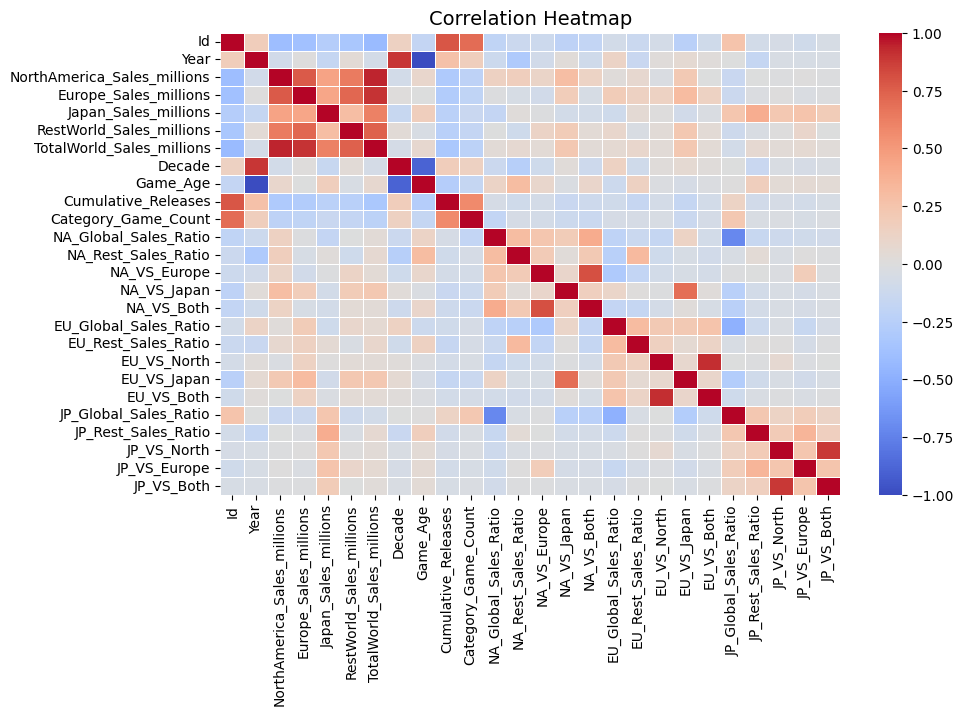

In [68]:
# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [69]:
# Corr 
df.corr(numeric_only=True)

,Id,Year,NorthAmerica_Sales_millions,Europe_Sales_millions,Japan_Sales_millions,RestWorld_Sales_millions,TotalWorld_Sales_millions,Decade,Game_Age,Cumulative_Releases,...,EU_Global_Sales_Ratio,EU_Rest_Sales_Ratio,EU_VS_North,EU_VS_Japan,EU_VS_Both,JP_Global_Sales_Ratio,JP_Rest_Sales_Ratio,JP_VS_North,JP_VS_Europe,JP_VS_Both
Id,1.000000,0.177378,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407,0.147676,-0.177378,0.787858,...,-0.080968,-0.136078,-0.075336,-0.238592,-0.097428,0.254816,-0.083692,-0.060878,-0.094434,-0.048323
Year,0.177378,1.000000,-0.091198,0.006005,-0.169159,0.041001,-0.074632,0.898323,-1.000000,0.269742,...,0.121888,-0.145082,0.021873,0.060443,0.019833,-0.007169,-0.165943,-0.043862,-0.053565,-0.040000
NorthAmerica_Sales_millions,-0.401362,-0.091198,1.000000,0.767727,0.449787,0.634737,0.941047,-0.080873,0.091198,-0.300232,...,0.017406,0.077031,-0.025431,0.212119,-0.007455,-0.143870,-0.001728,-0.014160,0.007779,-0.011748
Europe_Sales_millions,-0.379123,0.006005,0.767727,1.000000,0.435584,0.726385,0.902836,0.010104,-0.006005,-0.288982,...,0.190910,0.144858,0.133910,0.305551,0.138361,-0.127799,-0.020304,0.002028,-0.028911,-0.010782
Japan_Sales_millions,-0.267785,-0.169159,0.449787,0.435584,1.000000,0.290186,0.611816,-0.151429,0.169159,-0.227917,...,-0.106721,0.047704,0.004915,-0.088911,-0.028994,0.234998,0.397559,0.219489,0.250460,0.187700
RestWorld_Sales_millions,-0.332986,0.041001,0.634737,0.726385,0.290186,1.000000,0.748331,0.031383,-0.041001,-0.246665,...,0.088590,-0.034321,0.037432,0.223494,0.042387,-0.111554,-0.032015,0.005507,0.095423,-0.002334
TotalWorld_Sales_millions,-0.427407,-0.074632,0.941047,0.902836,0.611816,0.748331,1.000000,-0.065532,0.074632,-0.326644,...,0.060531,0.092990,0.035648,0.220101,0.040408,-0.083997,0.067721,0.037545,0.056125,0.027395
Decade,0.147676,0.898323,-0.080873,0.010104,-0.151429,0.031383,-0.065532,1.000000,-0.898323,0.174286,...,0.137796,-0.094470,0.019603,0.060220,0.018193,-0.004273,-0.142335,-0.038729,-0.058761,-0.034692
Game_Age,-0.177378,-1.000000,0.091198,-0.006005,0.169159,-0.041001,0.074632,-0.898323,1.000000,-0.269742,...,-0.121888,0.145082,-0.021873,-0.060443,-0.019833,0.007169,0.165943,0.043862,0.053565,0.040000
Cumulative_Releases,0.787858,0.269742,-0.300232,-0.288982,-0.227917,-0.246665,-0.326644,0.174286,-0.269742,1.000000,...,-0.100501,-0.163371,-0.071993,-0.165968,-0.082293,0.127489,-0.089277,-0.059136,-0.078351,-0.047338


In [70]:
target = "Category"

# Separate features and target
X = df.drop(columns=[target,"Name","Id","Gameplay_Focus","Genre"])
y = df[target]

# Encode the target if it's categorical
y = LabelEncoder().fit_transform(y)

# Encode all non-numeric columns in X
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Compute mutual information
mi = mutual_info_classif(X_encoded, y, discrete_features='auto')

# Create a Series to view feature importance
mi_scores = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

# Select top features 
selected_features = mi_scores[mi_scores > 0.08].index

# Filter dataframe
df_filtered = df[selected_features.to_list() + [target]]

print("✅ Columns kept (mutual information > 0.01):")
print(df_filtered.columns.tolist())

# Optional: show MI scores sorted
print("\n📊 Feature importance based on mutual information:")
print(mi_scores.head(10))


✅ Columns kept (mutual information > 0.01):
['Target_Audience', 'Age_Range', 'Skills', 'Multiplayer', 'Publisher', 'Name_Categorized', 'Publisher_Category', 'Platform', 'Category']

📊 Feature importance based on mutual information:
Target_Audience          1.404035
Age_Range                1.399773
Skills                   0.991864
Multiplayer              0.874501
Publisher                0.249375
Name_Categorized         0.124143
Publisher_Category       0.113697
Platform                 0.101351
JP_Global_Sales_Ratio    0.070982
NA_VS_Japan              0.066704
dtype: float64


In [71]:
df_filtered.head()

,Target_Audience,Age_Range,Skills,Multiplayer,Publisher,Name_Categorized,Publisher_Category,Platform,Category
0,Teens,13-19,High,Yes,Nintendo,Other,Nintendo,Wii,Sports/Racing
1,Kids,6-12,Low,No,Nintendo,Super Mario,Nintendo,NES,Puzzle/Casual
2,Kids/Teens,6-15,High,Yes,Nintendo,Super Mario,Nintendo,Wii,Sports/Racing
3,Teens,13-19,High,Yes,Nintendo,Other,Nintendo,Wii,Sports/Racing
4,Adults,20-40,Medium,No,Nintendo,Pokemon,Nintendo,GB,Adventure/Story


In [72]:
df[['Target_Audience', 'Age_Range', 'Skills', 'Multiplayer', 'Publisher','Name_Categorized', 'Publisher_Category', 'Platform', 'Category']].value_counts()

Target_Audience  Age_Range  Skills  Multiplayer  Publisher                               Name_Categorized     Publisher_Category  Platform  Category       
Teens            13-19      High    Yes          Electronic Arts                         Other                EA                  PS2       Sports/Racing      67
Adults           20-40      Medium  No           Ubisoft                                 Other                Ubisoft             DS        Strategy/Sim       55
Teens            13-19      High    Yes          Konami Digital Entertainment            Other                Konami              PS2       Sports/Racing      49
                                                 Electronic Arts                         Other                EA                  X360      Sports/Racing      47
                                                                                                                                  PS3       Sports/Racing      43
                                  

In [73]:
df_filtered.dtypes

Target_Audience       object
Age_Range             object
Skills                object
Multiplayer           object
Publisher             object
Name_Categorized      object
Publisher_Category    object
Platform              object
Category              object
dtype: object

## *Train test split*

In [74]:
X = df_filtered.drop(columns='Category')
y = df_filtered['Category']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(f"x_train size : {x_train.shape}")
print(f"x_test size : {x_test.shape}")
print(f"y_train size : {y_train.shape}")
print(f"y_test size : {y_test.shape}")

x_train size : (13278, 8)
x_test size : (3320, 8)
y_train size : (13278,)
y_test size : (3320,)


## *Function to train model*

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

def train_and_evaluate(model, param_grid=None, use_gridsearch=False, cv=3):
    # Detect column types
    categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
    numeric_cols = x_train.select_dtypes(exclude=['object', 'category']).columns

    # Preprocessing
    preprocessor = ColumnTransformer([
        ("categorical", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ("numeric", StandardScaler(), numeric_cols)
    ])

    # Pipeline
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    if use_gridsearch:
        if param_grid is None:
            raise ValueError("param_grid must be provided when use_gridsearch=True")
        search = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
        search.fit(x_train, y_train)
        best_model = search.best_estimator_
        print("✅ Best parameters:", search.best_params_)
        print("✅ Best CV accuracy:", search.best_score_)
    else:
        best_model = pipe
        best_model.fit(x_train, y_train)

    # Predictions
    y_pred_train = best_model.predict(x_train)
    y_pred_test = best_model.predict(x_test)

    # Evaluate
    results = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Test F1": f1_score(y_test, y_pred_test, average='weighted')
    }

    print("\n✅ Model:", model.__class__.__name__)
    for metric, value in results.items():
        print(f"{metric}: {value:.3f}")

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Return the trained pipeline, metrics, and predictions
    return best_model, results, y_pred_test


In [76]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

pipe, results, y_pred_test = train_and_evaluate(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    use_gridsearch=True,
    cv=3
)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


✅ Best parameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
✅ Best CV accuracy: 0.9573730983581865

✅ Model: RandomForestClassifier
Train Accuracy: 0.981
Test Accuracy: 0.955
Test F1: 0.954

📊 Classification Report:
                 precision    recall  f1-score   support

Action-Oriented       1.00      1.00      1.00      1095
Adventure/Story       0.84      0.90      0.87       543
    Misc/Casual       1.00      1.00      1.00       330
  Puzzle/Casual       1.00      1.00      1.00       294
  Sports/Racing       1.00      1.00      1.00       740
   Strategy/Sim       0.80      0.71      0.75       318

       accuracy                           0.95      3320
      macro avg       0.94      0.93      0.94      3320
   weighted avg       0.95      0.95      0.95      3320



In [77]:
import pickle

# 'pipe' is your trained pipeline from train_and_evaluate
with open("game_model.pkl", "wb") as f:
    pickle.dump(pipe, f)
